# Energy Consumption Analysis

This notebook visualizes processed energy consumption data generated by a simulated IoT pipeline.
The data is produced via Kafka, processed using Apache Spark, and stored as Parquet files.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
daily_df = pd.read_parquet(
    "../data-lake/processed/energy/daily_usage"
)

hourly_df = pd.read_parquet(
    "../data-lake/processed/energy/hourly_usage"
)

daily_df.head()

,event_date,total_energy_kwh
0,2026-01-22,53.44
1,2026-01-19,17.87
2,2026-01-21,18.23
3,2026-01-18,3.77


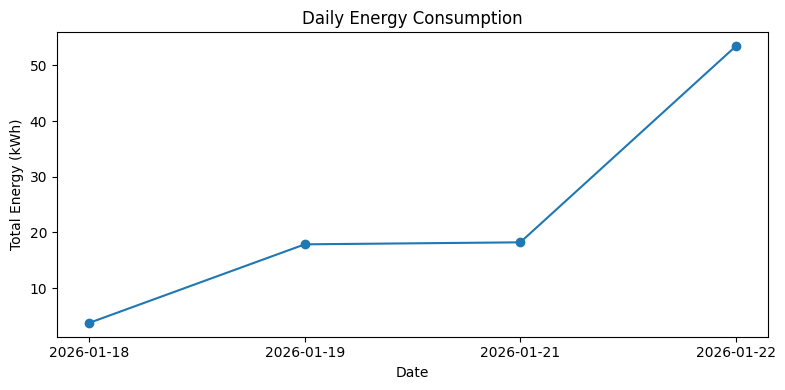

In [ ]:
daily_df_sorted = daily_df.sort_values("event_date") # sort by date for plotting

plt.figure(figsize=(8,4))
plt.plot(daily_df_sorted["event_date"], daily_df_sorted["total_energy_kwh"], marker='o') # x axis is date, y axis is total energy

plt.xlabel("Date")
plt.ylabel("Total Energy (kWh)")
plt.title("Daily Energy Consumption")
plt.tight_layout()
plt.show()

In [3]:
hourly_avg = hourly_df.groupby("event_hour")["total_energy_kwh"].mean().reset_index()
# hourly average gives a data frame with average energy consumption for each hour of the day

/var/folders/9z/14fsk10j3t5cf87r59x43syw0000gn/T/ipykernel_2871/3084370334.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_avg = hourly_df.groupby("event_hour")["total_energy_kwh"].mean().reset_index()


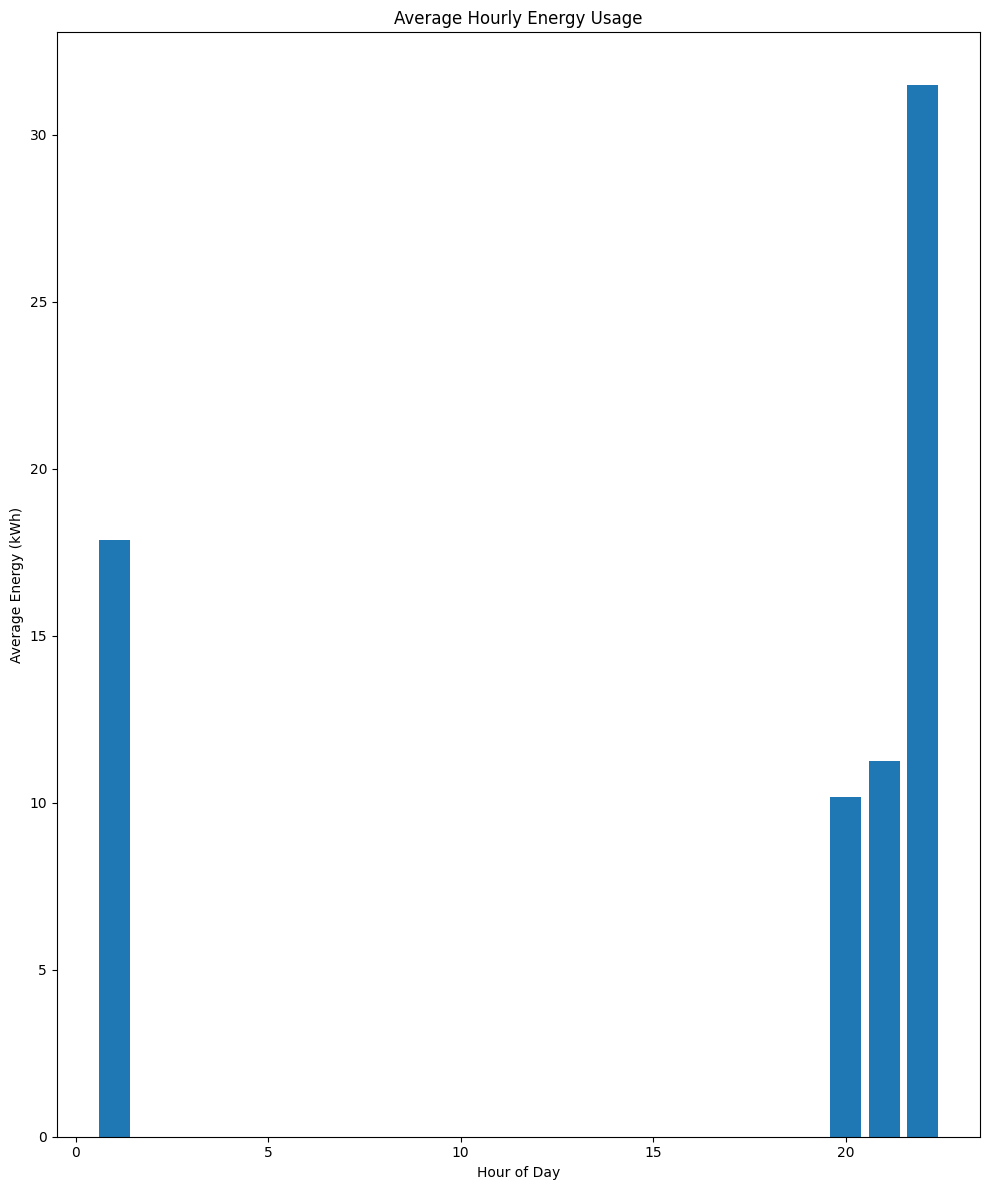

In [4]:
plt.figure(figsize=(10,12))
plt.bar(
    hourly_avg["event_hour"],
    hourly_avg["total_energy_kwh"]
)
plt.xlabel("Hour of Day")
plt.ylabel("Average Energy (kWh)")
plt.title("Average Hourly Energy Usage")
plt.tight_layout()
plt.show()